# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

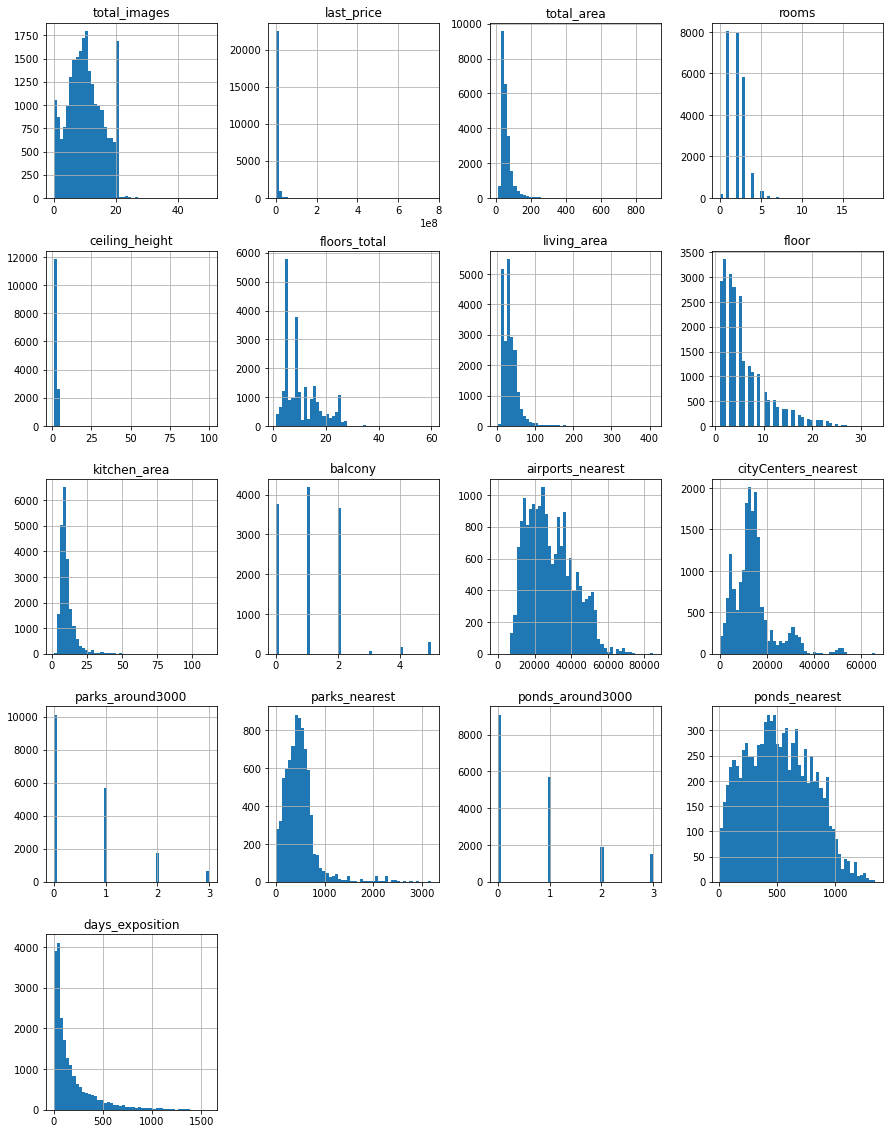

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 50) 
import matplotlib.pyplot as plt
import seaborn
data=pd.read_csv('real_estate_data.csv', sep='\t')
data.info()
print(data.head(20))
data.hist(bins=50,figsize=(15, 20))

### Предобработка данных

### Пропуски
Для начала мы проверяем количество пропусков в датафрейме.

#### Пропуски в столбце балконы:
Логично будет предположить,что пропуски возникли там, где количество балконов было не указано. Балконы могли не указать по той причине что их нет. А значет в данном случае можно заменить пропуски на 0.

#### Пропуски в столбце апартаментов
Пропуски в столбце апартаменты вероятнее всего возникли там, где объект апартаментами не является. Следовательно заменим пропуске на булево значение False.

#### Пропуски в названии населенного пункта могли возникнуть по нескольким причинам:  
-не указаны при размещении объявления
-произошла ошибка при выгрузке
Таких пропусков 49б это значительно меньше 10% от общих данных. Отсутствие названия населенного пункта может помешать дальнейшим исследованиям, поэтому мы удалим эти значения.

#### Пропуски в расстоянии до центра могли возникнуть по нескольким причинам:  

-не указаны при размещении объявления

-произошла ошибка при выгрузке

Эти данные необходимы для дальнейших исследований. Так как пропуски составляют более 10% от общих данных, просто удалить мы их не можем.Поэтому мы заполним пропуски медианым значением.

#### Высота потолков
Высота потолком могла быть не указана при размещении объявлений. Мы заполним пропуски медианым значением.

#### Пропуски в количестве этажей, площади кухни и комнат, количестве дней в продаже.
Тоже самое мы сделаем с пропусками в столбцах с общим количеством этажей,площадью кухни и комнат,и количеством дней в продаже

#### Пропуски в столбцах с количеством парков и прудов вокруг, а так же расстоянием до них
Такие пропускимогли возникнуть по той причине, что парков и прудов вокруг нет. Заполним пропуски в количестве парков и прудов нулем, а столбцы расстояний до них медианым значением.

#### Пропуски в расстоянии до аэропорта
Заполним данные медианым значением

In [3]:
data.isna().sum()
data['balcony']=data['balcony'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(False)
data['locality_name']=data['locality_name'].fillna(0)
data.dropna(subset=['locality_name'])
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['floors_total']=data['floors_total'].fillna(data['floors_total'].median())
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())
data['living_area']=data['living_area'].fillna(data['living_area'].median())
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].median())
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

##   Изменение типа данных
этаж, общее количество этажей,количество балконов,парки и пруды рядом,количество дней в продаже - это все целые числа(int)

является ли объект аппартаментами - булево значение

дата публикачии - это дата/время

##  Удаление дубликатов
Прежде всего приведем написание к единому регистру. Много неявных дубликатов обнаружено среди названий населенных пунктов. Дубликаты часто возникают из-за разного написания типа населенного пункта(пример поселок-посёлок). Для удобства работы оставим в столбце 'locality_name' только само название населенного пункта. После этого снова проверим пропущенные или пустые значения и запросим уникальные значения.

In [4]:
data['floor']=data['floor'].astype('int')
data['floors_total']=data['floors_total'].astype('int')
data['is_apartment']=data['is_apartment'].astype('bool')
data['balcony']=data['balcony'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['days_exposition']=data['days_exposition'].astype('int')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data.info()
data['locality_name'].unique()
data['locality_name']=data['locality_name'].str.lower()
data['locality_name']=data['locality_name'].str.strip()
data['locality_name']=data['locality_name'].str.replace('городской поселок ','')
data['locality_name']=data['locality_name'].str.replace('городской посёлок ','')
data['locality_name']=data['locality_name'].str.replace('деревня ','')
data['locality_name']=data['locality_name'].str.replace('коттеджный поселок ','')
data['locality_name']=data['locality_name'].str.replace('поселок ','')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа ','')
data['locality_name']=data['locality_name'].str.replace('поселок станции ','')
data['locality_name']=data['locality_name'].str.replace('посёлок ','')
data['locality_name']=data['locality_name'].str.replace('посёлок городского типа ','')
data['locality_name']=data['locality_name'].str.replace('садоводческое некоммерческое товарищество ','')
data['locality_name']=data['locality_name'].str.replace('садовое товарищество ','')
data['locality_name']=data['locality_name'].str.replace('село ','')
data['locality_name']=data['locality_name'].str.replace('городского типа ','')
data['locality_name']=data['locality_name'].str.replace('при железнодорожной станции ','')
data['locality_name']=data['locality_name'].str.replace('станции ','')
data['locality_name']=data['locality_name'].str.replace('коттеджный ','')
print(data.isna().sum())
data['locality_name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

## Аномальные значения
 Запросим уникальные значения высоты потолка. Предположим что аномально высокие показатели вроде 25 или 32 это ошибочно введенные высоты 2,5 и 3,2. Логически заменим все такие значения. Уберем из данных все показатели выше 8,5.
 Смотрим значение балконов более3. Видим что все эти данные выглядят странно. 3 балкона на 1 комнату и подобное. будем считать эти значения аномальными и уберем из данных.
 Комнаты. Запросим уникальные значения. Видим что Есть выбросы более 6 комнат.Такие данные кажутсяч не правдоподобными. Так как таких данных не много, удалим их.

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

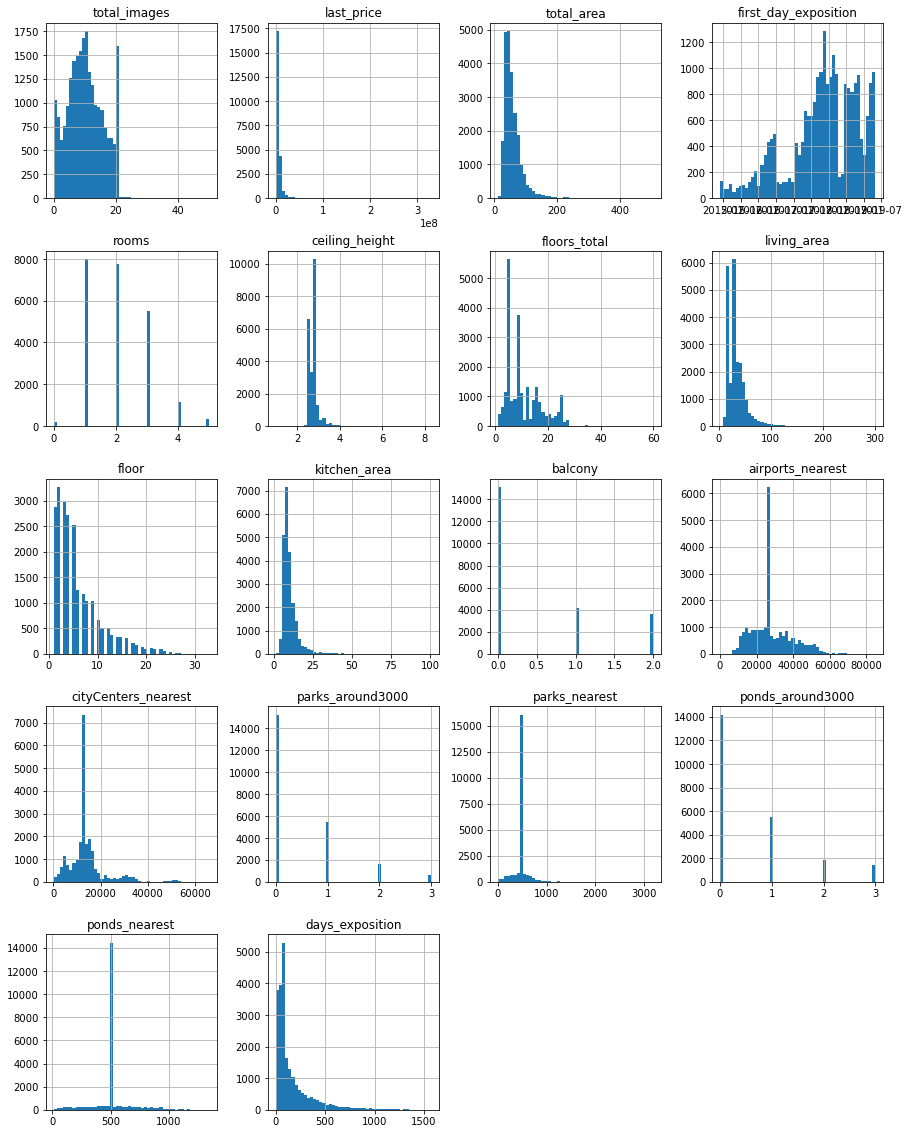

In [5]:
data['ceiling_height'].unique()
data['ceiling_height']=data['ceiling_height'].replace(25.0,2.5)
data['ceiling_height']=data['ceiling_height'].replace(32.0,3.2)
data['ceiling_height']=data['ceiling_height'].replace(27.0,2.7)
data['ceiling_height']=data['ceiling_height'].replace(24.0,2.4)
data['ceiling_height']=data['ceiling_height'].replace(26.0,2.6)
data['ceiling_height']=data['ceiling_height'].replace(20.0,2.0)
data=data.query('ceiling_height<8.5')
data=data.query('balcony<3')
data=data.query('balcony<3')
print(data['rooms'].unique())
data=data.query('rooms<6')
data.hist(bins=50,figsize=(15, 20))

### Посчитаем и добавим в таблицу новые столбцы

In [6]:
data['prise_metr']=data['last_price']/data['total_area']
def floors(floor):
    floors_total=floor['floors_total']
    floor=floor['floor']
    if floor==1:
        return 'первый'
    elif floor==floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_type']=data.apply(floors,axis=1)
data['day_week']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year
data['cityCenters_km']=round(data['cityCenters_nearest']/1000)
data['cityCenters_km']=data['cityCenters_km'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prise_metr,floor_type,day_week,month,year,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370,другой,3,3,2019,16
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,455.0,0,502.0,81,82920.792079,первый,1,12,2018,19
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,другой,3,8,2015,14
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,30.0,9,False,False,False,9.1,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,другой,4,7,2015,7
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,другой,1,6,2018,8


### Проведите исследовательский анализ данных

Построим гистограммы для разных значений.Рассмотри подробнее интересувющие нас.

#### 1)Общая площадь квартиры:
 Мы видим, что большинство продаваемых квартир импеют общую площадь до 60 кв. метров. Квартры площадью более 100 кв. метров встречаются значительно реже. И оченьнебольшое количество квартир имеют площадь свыше 200 кв. метров, обычно это многокомнатные квартиры.
#### 2)Площадь комнат:
 Наибольшее количество предложений с жилой площадью в диапазоне от 20 до 35 кв. метров. Предложения с жилой площадью более 50 квы. метров встречаются значительно реже. Но так же попадаются предложения с площадью 100 кв. метров и более.
#### 3)Площадь кухни:
 Наиболее часты предложения с площадью кухни в районе 10 кв. метров. Кухни более 20 кв. метров уже встречаются редко.
##4)Общая стоимость:
 Цены на квартиры в значительной степени не колеблются. Попадаются значения выше рынка, но их не много.
#### 5)Количество комнат:
 Больше всего на рынке недвижимости продают 1 и 2 комнатные квартиры. Квартиры с 4 и 5 комнатами встречаются значительно реже.
#### 6)Высота потолков:
 Самая распространенная высота потолков - это иапозон от 2,5 до 3,0. Квартиры с более высокими потолками уже редки, возможно это двухуровневые квартиры.
#### 7)Этаж:
 Чаще всего попадают в продажу квартиры находящиеся не выше 7 этажа. Квартиры выше 20 этажа редкость.
#### 8)Общая этажность дома:
 Наиболее распространены 5 и 9 этажные дома. Дома выше 27 этажей очень редки. Так же редко попадаются дома в 11 и 13 этажей.
#### 9)Удаленность от центра в метрах:
 Много квартир в непосредственной близости от центра. Так же больое количество на удаленности в диапозоне от 10000 до 20000 метров.
#### 10)Удаленность от аэропорта:
 Сильно выделяется среди предложений количество квартир удаленных от аэропорта на расстояние около 15000 метров. Нет квартир ближе 5000 метров. Встречаются квартры сильно удаленные, на расстоянии от 60000 метров и более.
#### 11)Расстояние до ближайшего парка:
 Сильно выбиваются значения с расстояние парка в 0 метров. при этом мы понимаем, что скорее всего это означает что парка поблизости нет, т.к. изучив данные видим что 0 в расстоянии до парка часто стоит там где и к количестве парков рядом тоже указано 0.
#### 12)Дата публикации:
 Пик продаж был в конце 2017 года. Так же можно заметить что с 2015 года количество объявлений о продаже растет, за редкими спадами. Чаще публикуют объявления о продаже квартит во второй половине года, исключением можно считать 2018 год.

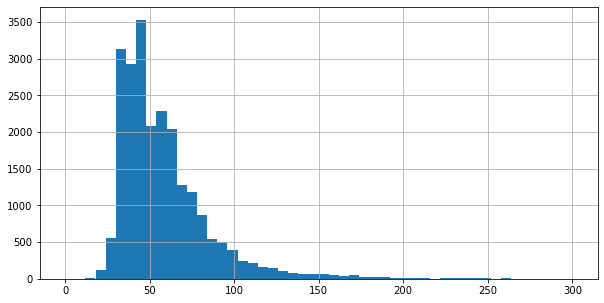

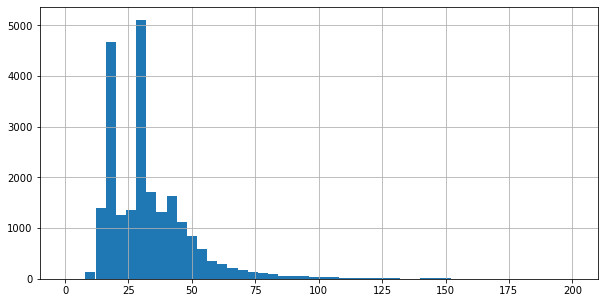

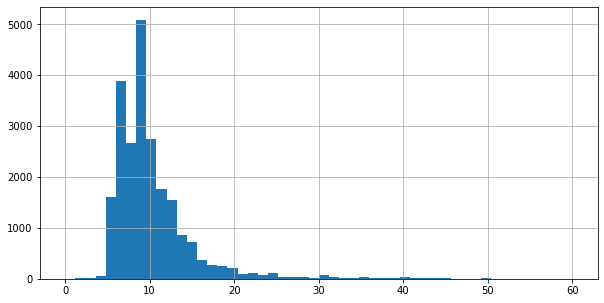

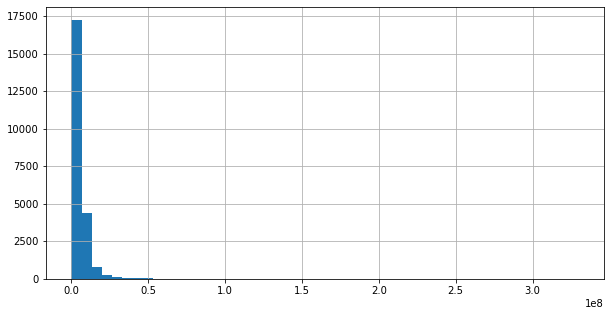

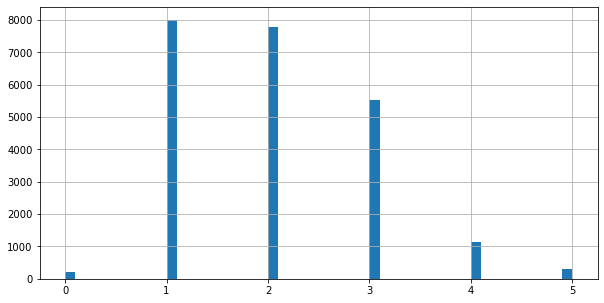

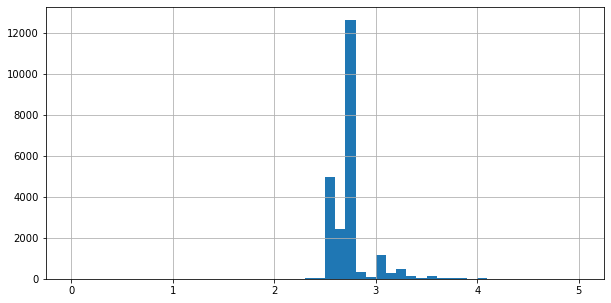

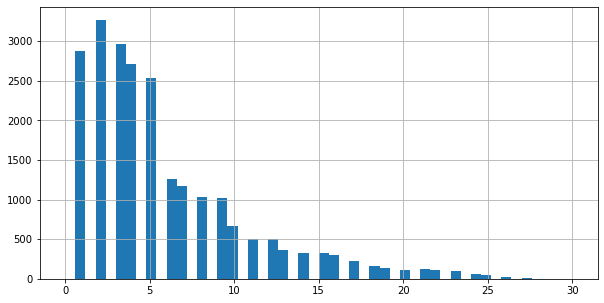

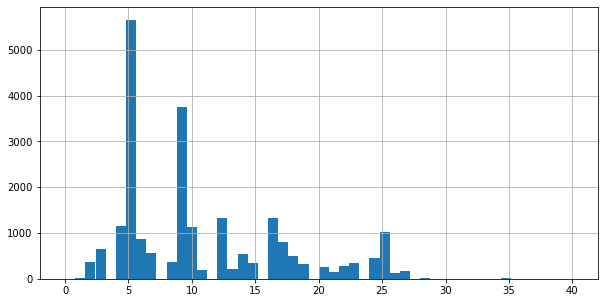

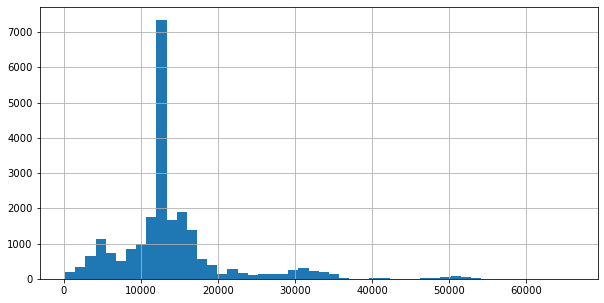

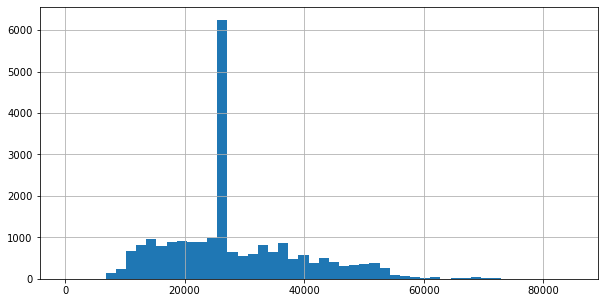

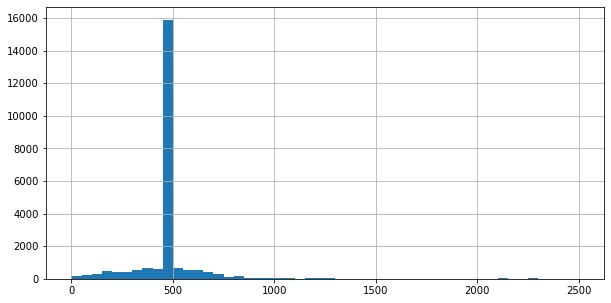

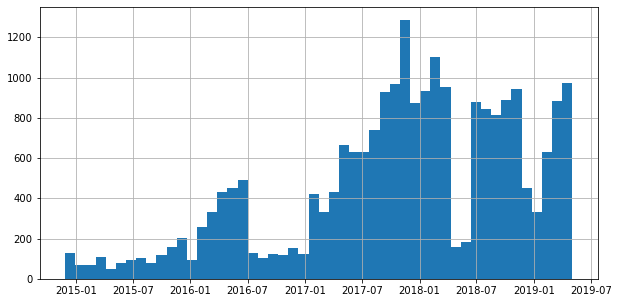

In [7]:
data['total_area'].hist(bins=50,figsize=(10, 5),range = (0, 300))
plt.show()
data['living_area'].hist(bins=50,figsize=(10, 5),range = (0, 200))
plt.show()
data['kitchen_area'].hist(bins=50,figsize=(10, 5),range = (0, 60))
plt.show()
data['last_price'].hist(bins=50,figsize=(10, 5))
plt.show()
data['rooms'].hist(bins=50,figsize=(10, 5))
plt.show()
data['ceiling_height'].hist(bins=50,figsize=(10, 5),range = (0, 5))
plt.show()
data['floor'].hist(bins=50,figsize=(10, 5),range = (0, 30))
plt.show()
data['floors_total'].hist(bins=50,figsize=(10, 5),range = (0, 40))
plt.show()
data['cityCenters_nearest'].hist(bins=50,figsize=(10, 5))
plt.show()
data['airports_nearest'].hist(bins=50,figsize=(10, 5))
plt.show()
data['parks_nearest'].hist(bins=50,figsize=(10, 5),range = (0, 2500))
plt.show()
data['first_day_exposition'].hist(bins=50,figsize=(10, 5))
plt.show()

среднее количество дней продажи 168.90638761717898
медиана количества дней продажи 95.0
зависимость цены от общей площади 0.6908427718111878
зависимость цены от жилой площади 0.5569004427880468
зависимость цены от площади кухни 0.4935949648179555
зависимость цены от количества комнат 0.36322001212879984
зависимость цены от расстояния до аэропорта -0.01214599995977489
               median  count
floor_type                  
другой      4775000.0  16844
первый      3900000.0   2875
последний   4250000.0   3216


<AxesSubplot:>

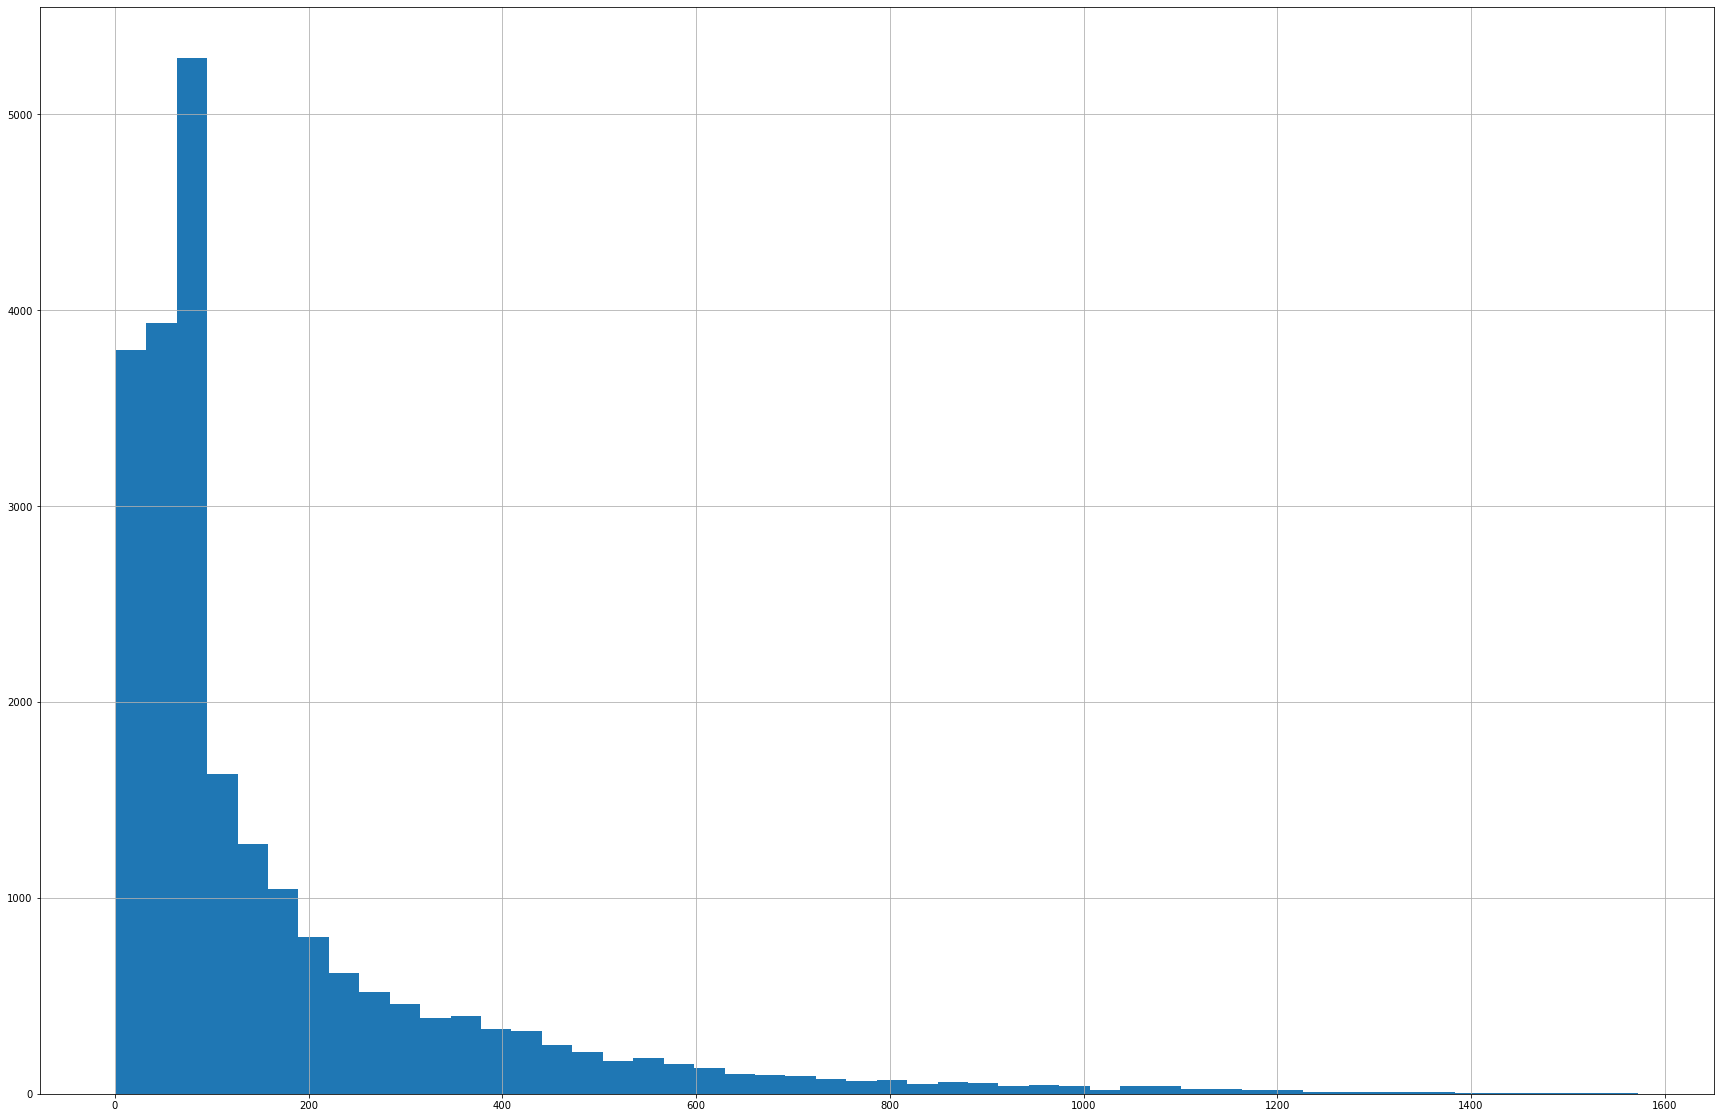

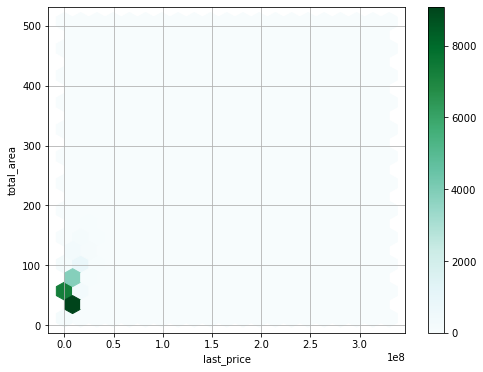

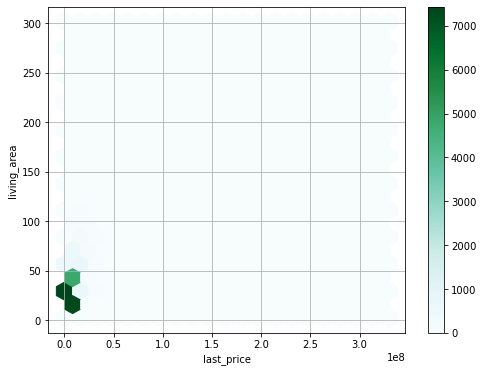

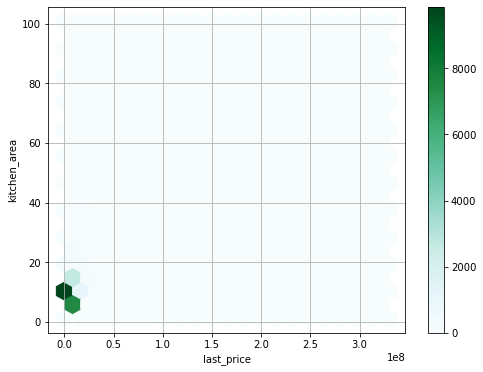

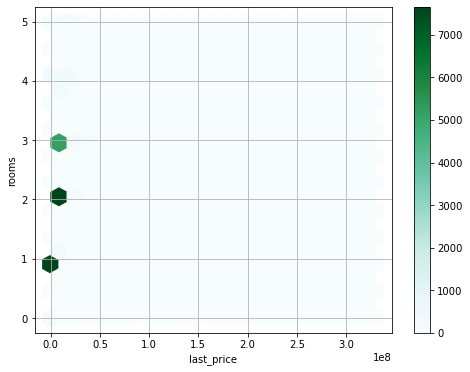

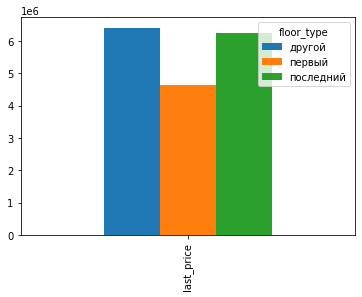

In [8]:
#построим гистограмму количества дней продажи. Взглянув на нее можно заметить что большинство квартир продаются в срок до полугода (180 дней)
#Небольшое количество квартир висят в продаже более года. Но и встречаются квартиры продаваемые по несколько лет. Это может быть связано с тем что объявление забывают снять, либо это специфичные квартиры в непопулярных населенных пунктах.
data['days_exposition'].hist(bins=50,figsize=(30, 20))
#посмотрим среднее и медианое значение количества дней продажи
print('среднее количество дней продажи',data['days_exposition'].mean())
print('медиана количества дней продажи',data['days_exposition'].median())
#эти значения сильно разнятся. Происходит это по причине аномально высоких значений по ряду квартир. Но мы не можем с точностью сказать ошибочны ли эти значения.
#посчитаем корреляцию цены от разных показателей
#на стоимость квартиры имеет достаточно сильное  положительное влияние общая площадь квартиры
print('зависимость цены от общей площади',data['last_price'].corr(data['total_area']))
#на стоимость квартиры имеет достаточно сильное  положительное влияние жилая площадь квартиры
print('зависимость цены от жилой площади',data['last_price'].corr(data['living_area']))
#чуть меньше на стоимость квартиры влияет площадь кухни
print('зависимость цены от площади кухни',data['last_price'].corr(data['kitchen_area']))
#так же положительно влияет на стоимость количество комнат в квартире
print('зависимость цены от количества комнат',data['last_price'].corr(data['rooms']))
#удаленность от аэропорта не оказывает значительного влияния на цену
print('зависимость цены от расстояния до аэропорта',data['last_price'].corr(data['airports_nearest']))
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
#посмотрим зависимость цены от типа этажа на котором находится продаваемый объект. для этого построим таблицу в которой укажим медианое значение стоимости объектов в зависимости от типа этажа, а так же количество разных объявлений
data_floor_type=data.pivot_table(index='floor_type',values='last_price',aggfunc=['median','count'])
data_floor_type.columns=['median','count']
print(data_floor_type)
data_floor_type =data.pivot_table(columns='floor_type', values='last_price')
data_floor_type.plot(kind='bar')
#глядя на получившуюся таблицу можно заметить, что значительно выделяются квартиры с типом этажа "другой", что легко объяснить тем что в этот параметр попадали объекты с более широкой выборкой. 
#Самыми дорогими являются квартиры расположенные не на первом и не на последнем этажах. чуть дешевле будут квартиры на последнем этаже. и значительно дешевле квартиры расположенные на первом этаже, их цена меньше больше чем на 1500000 от цен на квартиры на других этажах

<AxesSubplot:>

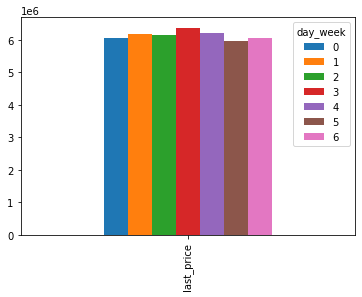

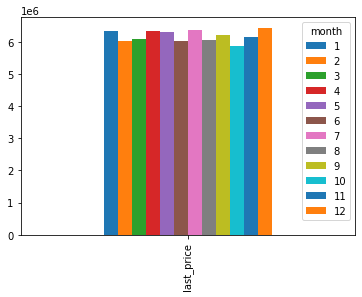

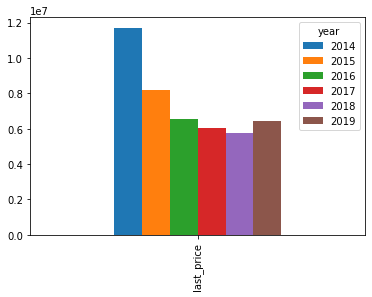

In [9]:
#для оценки зависимости цены от нелинейных показателей (даты публикации и типа этажа) построим столбчатые диаграммы
#видно что день и месяц публикации почти никак не влияет на цену объекта
data_day =data.pivot_table(columns='day_week', values='last_price')
data_day.plot(kind='bar')
data_month =data.pivot_table(columns='month', values='last_price')
data_month.plot(kind='bar')
#глядя на год публикации заметим что цены на недвижимость были выше в 2014 году, после чего они упали и уже дальше значительно не менялись
data_year =data.pivot_table(columns='year', values='last_price')
data_year.plot(kind='bar')

                 count           sum       area     metr_price
locality_name                                                 
санкт-петербург  15147  1.143793e+11  941037.04  121546.038707
мурино             576  2.104029e+09   25196.14   83505.993378
кудрово            465  2.016440e+09   21438.83   94055.494633
шушары             430  1.752156e+09   22891.61   76541.405301
всеволожск         382  1.426169e+09   21073.33   67676.488006
пушкин             355  2.189797e+09   20915.18  104698.944212
колпино            326  1.242744e+09   16904.14   73517.152958
парголово          326  1.459700e+09   16646.00   87690.764087
гатчина            296  1.016019e+09   14893.88   68217.238221
выборг             235  7.640830e+08   13164.66   58040.465914
locality_name    всеволожск        выборг       гатчина       колпино  \
metr_price     67676.488006  58040.465914  68217.238221  73517.152958   

locality_name       кудрово        мурино     парголово         пушкин  \
metr_price     94055.49

(0.0, 200000.0)

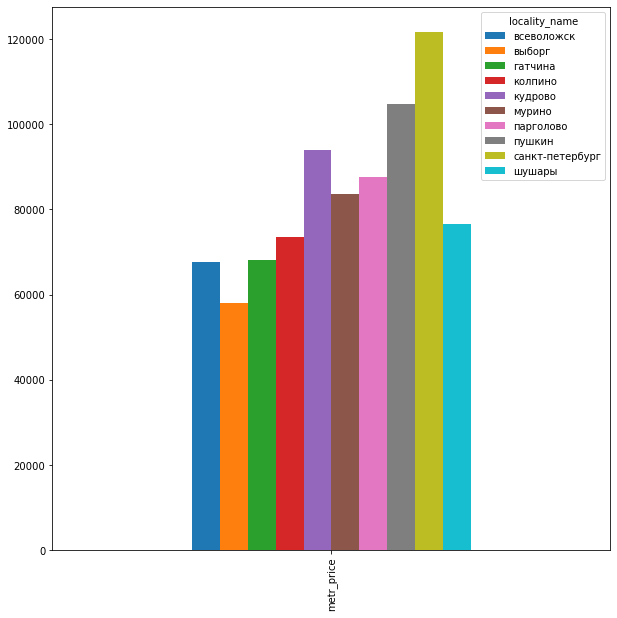

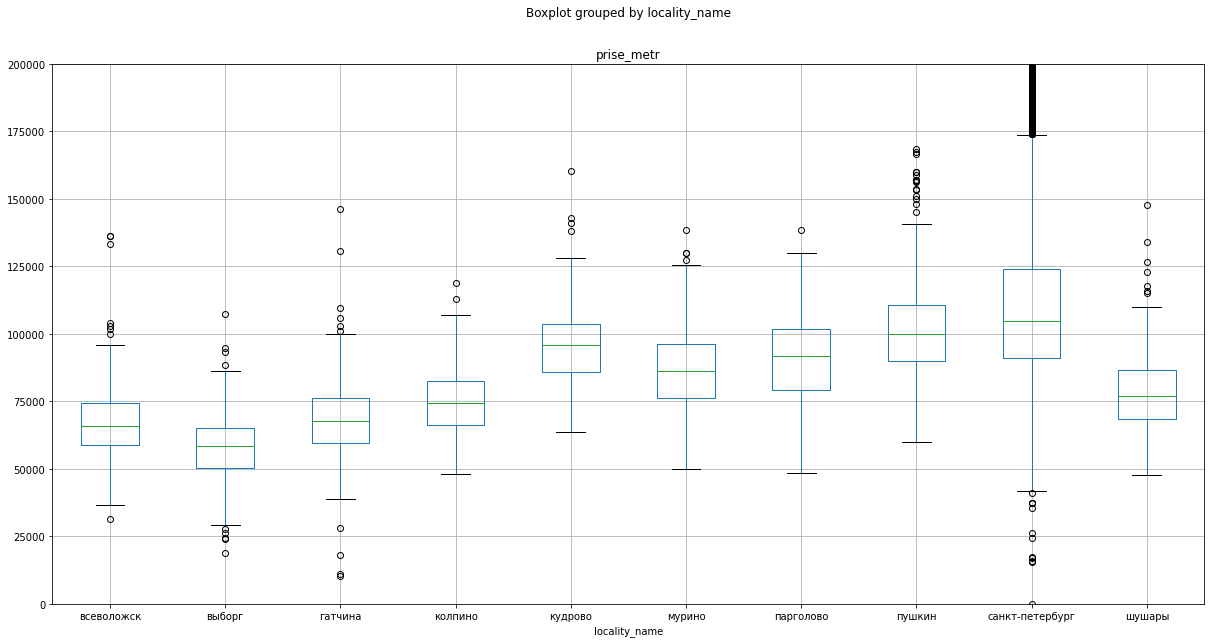

In [11]:
#создадим новую таблицу куда войдут публикации из 10 самых часто публикуемых населенных пунктов, общая стоимость квартир в этих населенных пунктах, общая площадь таких квартир,количество объявлений и цена за метр квадратный
data_sample=data.pivot_table(index='locality_name',values='last_price',aggfunc=['count','sum'])
data_sample.columns=['count','sum']
data_sample=data_sample.sort_values('count',ascending=False).head(10)
data_sample_area=data.pivot_table(index='locality_name',values='total_area',aggfunc=['count','sum'])
data_sample_area.columns=['count','sum']
data_sample_area=data_sample_area.sort_values('count',ascending=False).head(10)
data_sample['area']=data_sample_area['sum']
data_sample['metr_price']=data_sample['sum']/data_sample['area']
print(data_sample)
data_sample_plot =data_sample.pivot_table(columns='locality_name', values='metr_price')
print(data_sample_plot)
data_sample_plot.plot(kind='bar',figsize=(10, 10))
ax = (data
    .query('locality_name in @data_sample.index')
    .boxplot('prise_metr', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

                 median_price  median_km  median_price_km
locality_name                                            
санкт-петербург     5450000.0         12    454166.666667


<AxesSubplot:>

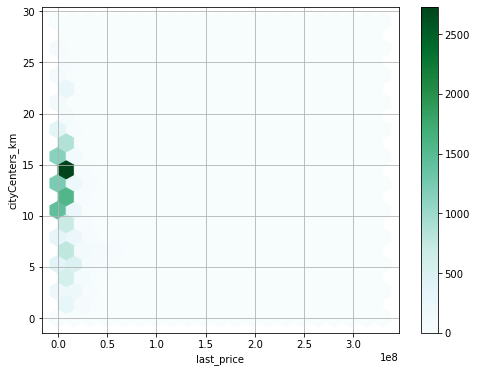

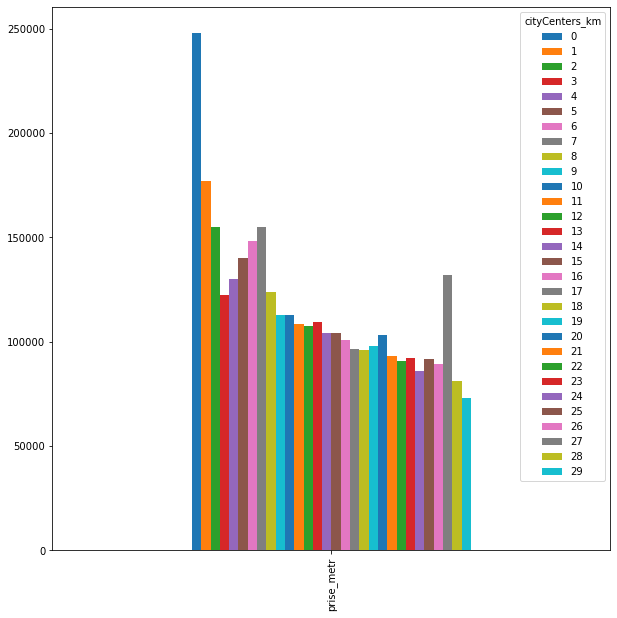

In [12]:
#взглянув на получившуюся таблицу видим, что самые дорогие кв. метры в Санкт-Петербурге. А самые дешевые в Выборге.
#теперь посмотрим на квартиры в Санкт-Петербурге и их среднюю стоимость. А так же как эти квартиры удалены от центра в километрах. И посчитаем стоимость каждого такого километра.
data_piter_sample=data.query('locality_name=="санкт-петербург"')
data_piter=data_piter_sample.pivot_table(index='locality_name',values='last_price',aggfunc='median')
data_piter.columns=['median_price']
data_piter_km=data_piter_sample.pivot_table(index='locality_name',values='cityCenters_km',aggfunc='median')
data_piter_km.columns=['median_km']
data_piter['median_km']=data_piter_km['median_km']
data_piter['median_price_km']=data_piter['median_price']/data_piter['median_km']
print(data_piter)
data_piter_sample.plot(x='last_price', y='cityCenters_km', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
#мы видим что стоимость каждого километра почти 690000 руб.
data_piter_metr=data_piter_sample.pivot_table(columns='cityCenters_km',values='prise_metr')
data_piter_metr.plot(kind='bar',figsize=(10, 10)) 

На графике хорошо видна зависимость цены квадратного метра от близости расположения к центру. самыми дорогими являютмя квартиры в центре. и далее график цен начинает падать. есть небольшое увеличение цены на расстоянии 27 км. Это может быть связано с другими факторами, например элитная частная застройка, или удобный выезд в аэропорт.

### Общий вывод

### Предобработка данных
#### В исходных данных были обнаружены следующие пропуски: 

1.1  Пропуски в столбце балконы:
Логично будет предположить,что пропуски возникли там, где количество балконов было не указано. Балконы могли не указать по той причине что их нет. А значет в данном случае можно заменить пропуски на 0.

1.2  Пропуски в столбце апартаментов
Пропуски в столбце апартаменты вероятнее всего возникли там, где объект апартаментами не является. Следовательно заменим пропуске на булево значение False.

1.3  Пропуски в названии населенного пункта могли возникнуть по нескольким причинам:
-не указаны при размещении объявления -произошла ошибка при выгрузке Таких пропусков 49б это значительно меньше 10% от общих данных. Отсутствие названия населенного пункта может помешать дальнейшим исследованиям, поэтому мы удалим эти значения.

1.4  Пропуски в расстоянии до центра могли возникнуть по нескольким причинам:
-не указаны при размещении объявления -произошла ошибка при выгрузке Эти данные необходимы для дальнейших исследований. Так как пропуски составляют более 10% от общих данных, просто удалить мы их не можем.Поэтому мы заполним пропуски медианым значением.

1.5  Высота потолков
Высота потолком могла быть не указана при размещении объявлений. Мы заполним пропуски медианым значением.

1.6  Пропуски в количестве этажей, площади кухни и комнат, количестве дней в продаже.
Тоже самое мы сделаем с пропусками в столбцах с общим количеством этажей,площадью кухни и комнат,и количеством дней в продаже

1.7  Пропуски в столбцах с количеством парков и прудов вокруг, а так же расстоянием до них
Такие пропускимогли возникнуть по той причине, что парков и прудов вокруг нет. Заполним пропуски в количестве парков и прудов нулем, а столбцы расстояний до них медианым значением.

1.8  Пропуски в расстоянии до аэропорта
Заполним данные медианым значением

####  Изучили типы данных и зменили их в соответствии с содержимым:
1.1 Этаж, общее количество этажей,количество балконов,парки и пруды рядом,количество дней в продаже - это все целые числа(int)
1.2 Является ли объект аппартаментами - булево значение
1.3 Дата публикации - это дата/время

####  Удаление дубликатов
Запросив уникальные знеачения названий населенных пунктов.Прежде всего это связано с разным написанием типа населенного пункта. Обработали.Прежде всего привели написание к единому регистру.Для удобства работы оставили в столбце 'locality_name' только само название населенного пункта удалив тип и прочии приписки.

####  Аномальные значения

1.1 Запросили уникальные значения высоты потолка. Аномально высокие показатели вроде 25 или 32 могут быть ошибочно введенные высоты 2,5 и 3,2. Логически заменили все такие значения. Уберали из данных все показатели выше 8,5.

1.2 Посмотрели значения балконов более 3. заметилои что все эти данные выглядят аномально. 3 балкона на 1 комнату и подобное. Посчитали такие данные ошибочными и избавились от них.

1.3 Запросили уникальные значения количества комнат. Обнаружили что встречаются показатели более 6 комнат.Такие данные кажутся не правдоподобными. Приняли решение избавиться от аномальных значений.

# Выводы:
##   В основном квартиры продаются в срок до 168 дней. 
Но встречаются и квартиры с большим сроком продажи и достигать 1600 дней. Причина долгих объявлений может крыться в том, что объявление забывают "снять". А так же с тем что продается нетипичное жилье (очень большая площадь или высокая цена, неудачное расположение)
##   Наибольшее влияние на стоимость квартиры оказывают Общая площадь квартиры, жилая площадь и площадь кухни. Так же на цену квартиры влияет количество комнат.

1)Общая площадь квартиры:
Мы видим, что большинство продаваемых квартир импеют общую площадь до 60 кв. метров. Квартры площадью более 100 кв. метров встречаются значительно реже. И оченьнебольшое количество квартир имеют площадь свыше 200 кв. метров, обычно это многокомнатные квартиры.

2)Площадь комнат:
Наибольшее количество предложений с жилой площадью в диапазоне от 20 до 35 кв. метров. Предложения с жилой площадью более 50 квы. метров встречаются значительно реже. Но так же попадаются предложения с площадью 100 кв. метров и более.

3)Площадь кухни:
Наиболее часты предложения с площадью кухни в районе 10 кв. метров. Кухни более 20 кв. метров уже встречаются редко. 

4)Количество комнат:
Больше всего на рынке недвижимости продают 1 и 2 комнатные квартиры. Квартиры с 4 и 5 комнатами встречаются значительно реже.
##   Зависимость стоимости от типа этажа:
Стоимость будет сильно зависить от типа этажа на котором располагается квартира. Самыми дорогими будут квартиры расположенные не на первом и не на последнем этажах. Средняя стоимость таких квартир 4775000 руб. Квартир в другим типом этажа продается больше всего 16844 объявления.
Немного дешевле будут квартиры на последнем этаже. Их средняя стоимость 4250000 руб. Таких предложений значительно меньше, всего 3216.
Самыми дешевыми оказались квартиры первого этажа. стоимость таких квартир в среднем составила 3900000 руб. Количество таких объявлений 2875.
##    Влияет ли на стоимость дата публикации
Посмотрев на данные можно сказать что день и месяц публикации не имеют сильного влияния на стоимость квартиры. При этом заметим что стоимость квартир была в своем максимальном пике в 2014 году. после чего произошло падение цен и далее стоимость уже значительных изменений в зависимости от года публикации не претерпевала.
##    Удаленность от аэропорта
Еще раз посмотрев на данные. Изучив корреляцию и поспотрев гистограмму можно сказать что удаленность от аэропорта сильного влияния на цену не оказывает.
##    Самый дорогой квадратный метр
Изучив 10 самых часто публикуемых населенных пунктов мы выяснили Следующее:
Самый дорогой квадратный метр будет в Санкт-Петербурге,его стоимость составит 121500 руб.  за кв. метр
Далее идет Пушкин, стоимость 104000 руб. за кв. метр.
А вот дешевле всего 1 кв. метр будет в Выборге,его стоимость составит  58000 руб.
##    Сколько стоит каждый киллометр до центра в Санкт-Петербурге
Так же подробнее изучили объявления о продаже  квартир в Санкт-Петербурге и выяснили что Цена каждого км в расстоянии до центра составляет около 650000 рублей. Соответственно чем ближе квартира к центру тем она дороже, при прочих равных.
Удаленность от аэропорта.